# WELCOME!

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

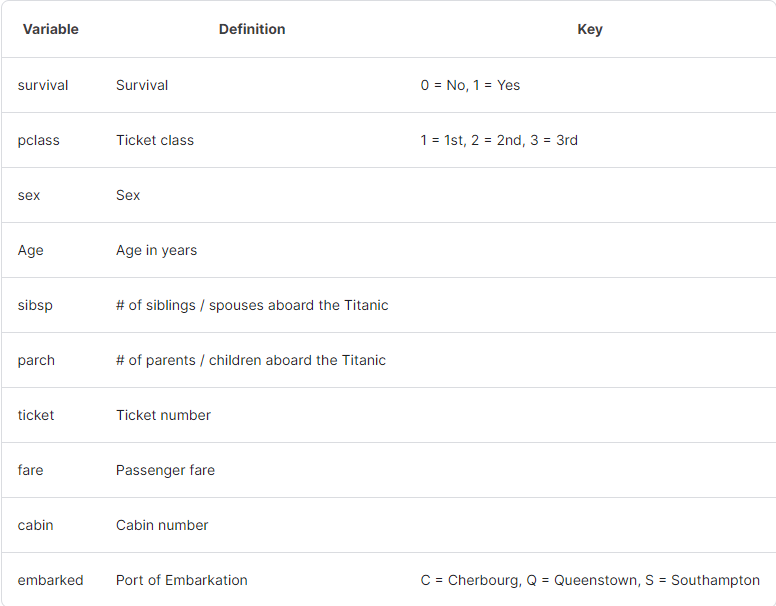

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Import libraries and tools

In [2]:
# EDA için kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Grafikleri göstermek için
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from yellowbrick.classifier import ClassPredictionError, ROCAUC
# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Exploratory Data Analysis and Visualization

In [117]:
df = pd.read_csv('train.csv')

In [118]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Std = df.std()
    Mean = df.mean()
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls','Mean', 'Std', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Mean, Std, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (891, 12)
___________________________
Data Types:
object     5
int64      5
float64    2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Mean,Std,Min,Max
Age,float64,714,89,177,29.699118,14.526497,0.42,80.0
Cabin,object,204,148,687,NaN,NaN,NaN,NaN
Embarked,object,889,4,2,NaN,NaN,NaN,NaN
Fare,float64,891,248,0,32.204208,49.693429,0.0,512.3292
Name,object,891,891,0,NaN,NaN,"Abbing, Mr. Anthony","van Melkebeke, Mr. Philemon"
Parch,int64,891,7,0,0.381594,0.806057,0,6
PassengerId,int64,891,891,0,446.000000,257.353842,1,891
Pclass,int64,891,3,0,2.308642,0.836071,1,3
Sex,object,891,2,0,NaN,NaN,female,male
SibSp,int64,891,7,0,0.523008,1.102743,0,8


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [122]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [123]:
missing_values(df)

,Missing_Number,Missing_Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245


# Dropping irrelevant columns to decide which passengers survived.

In [124]:
## Names column seems like it is irrelevant feature for survival situation.
df.drop(columns=['Name'],inplace=True)  

In [125]:
## Passenger ID is only number is assigned to each passenger without any mean.
df.drop(columns=["PassengerId"],inplace=True)


In [126]:
## Ticket values are also doesn't tell much about any important feature. Also has unique values for each passenger and checked for the any involvement for placing passengers but couldn't found.
df.drop(columns=['Ticket'],inplace=True)

In [127]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Cabin is not mandatory too but only the starting letter of the given cabin values could be useful. So, I distracted it from the data and checked.

In [128]:
def process_cabin(column):
    new_column = []

    for value in column:
        if pd.isna(value):
            new_column.append(np.nan)
        else:
            new_column.append(value[0])
    
    return new_column

In [129]:
cabin_letter = process_cabin(df['Cabin'])

In [130]:
df['cabin_letter'] = cabin_letter

In [131]:
df.drop(columns=['Cabin'],inplace=True)

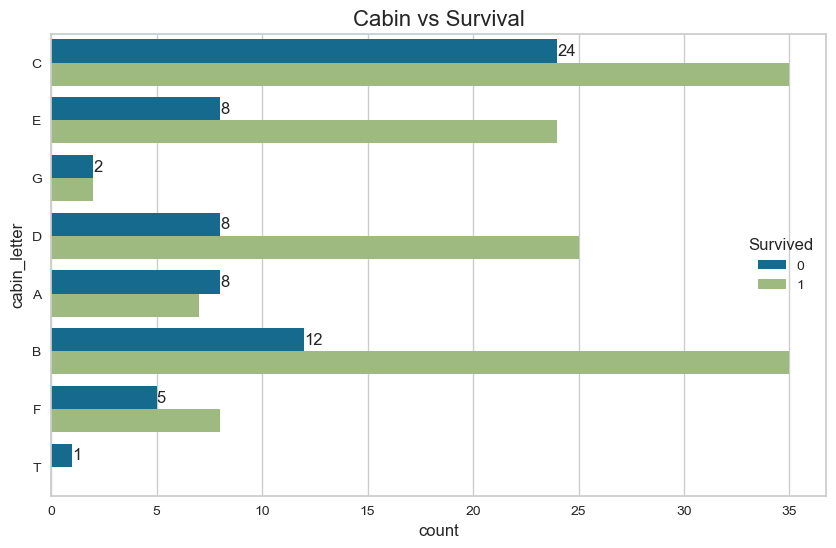

In [132]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['cabin_letter'], hue = df['Survived'])
plt.title("Cabin vs Survival", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [133]:
## only cabin values starting with A has significant difference and it doesn't tell much. So, I decided to drop it too.
df.drop(columns=['cabin_letter'],inplace=True)

# Age

In [134]:
### Grouping age numbers to understand clearly and reducing tons of unique values which could complicate results.

def age_classifier(age):
    if age < 10:
        return 'Kid'
    elif age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 55:
        return 'Adult'
    else:
        return 'Senior'

In [135]:
df['Age'] = df['Age'].apply(age_classifier)

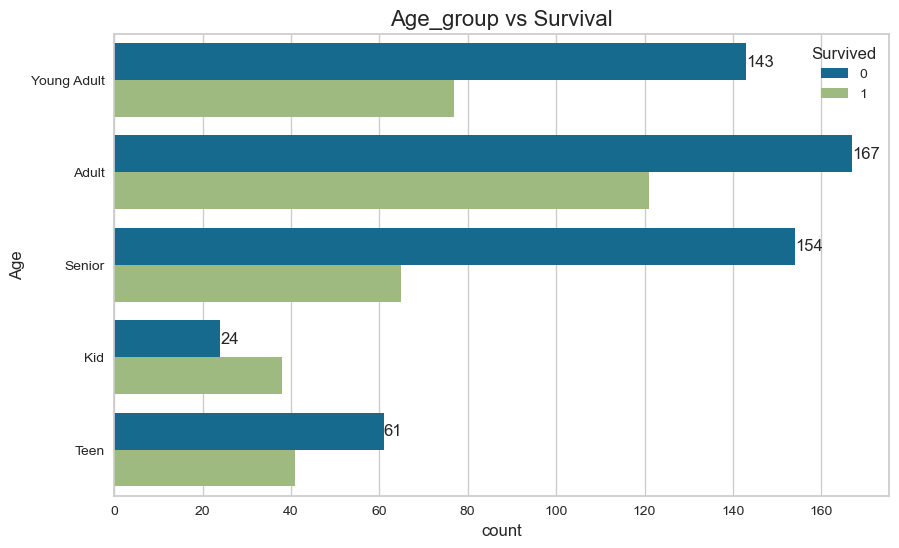

In [136]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Age'], hue = df['Survived'])
plt.title("Age_group vs Survival", fontsize = 16)
ax.bar_label(ax.containers[0]);

# Sex

In [137]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

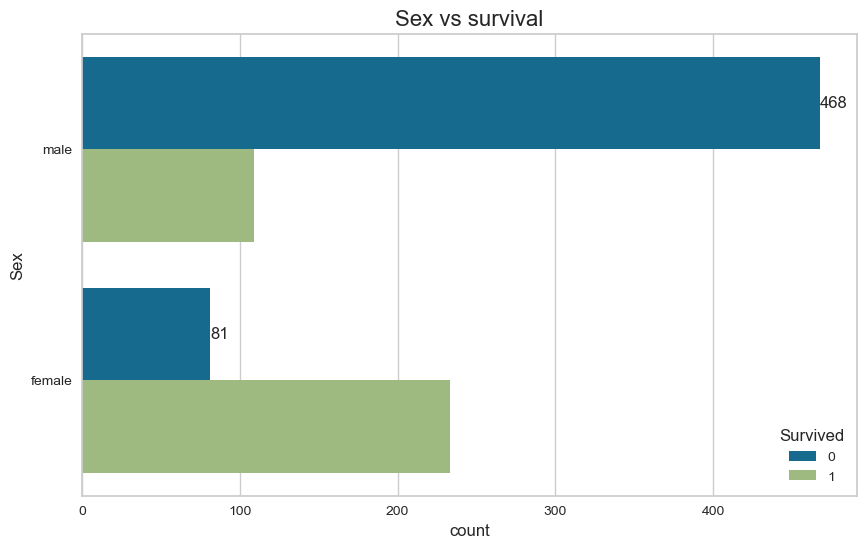

In [138]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Sex'], hue = df['Survived'])
plt.title("Sex vs survival", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [139]:
missing_values(df)

,Missing_Number,Missing_Percent
Embarked,2,0.002245


# Embarked (Place where people boarded the ship)

## Embarked data is also doesn't make any sense to affect the outcome of survival. Still, I kept that in the data since, missing values are very low and could be beneficial to obtain better score.

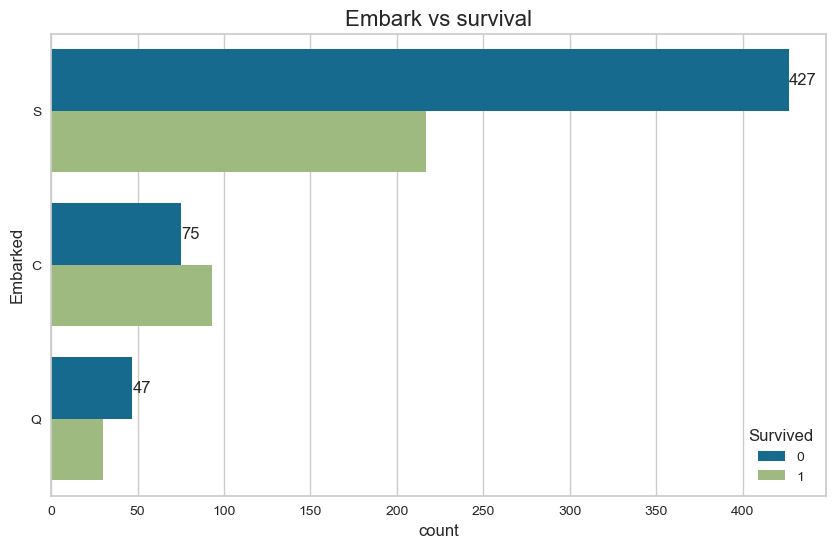

In [140]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Embarked'], hue = df['Survived'])
plt.title("Embark vs survival", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [141]:
df.Embarked.fillna('S',inplace= True)

In [142]:
missing_values(df)

,Missing_Number,Missing_Percent


## Pclass

In [143]:
## Don't need to apply for boosting methods, just wrote it here to have the option.
def pclass_labeling(pclass):
    new_pclass = []
    for i in pclass:
        if i ==1:
            new_pclass.append('Upper_Class')
        elif i ==2:
            new_pclass.append('Medium_Class')
        elif i ==3:
            new_pclass.append('Lower_Class')
    return new_pclass

## Saving data after EDA

In [144]:
df1 = df.copy()

In [145]:
df.to_excel('train_after_EDA.xlsx', index=False)

In [3]:
df = pd.read_excel('train_after_EDA.xlsx')

# Train and Test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(columns='Survived')
y = df['Survived']

# Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
### if there was an hierarcy in column. Those cat_ordinal parameters given manually ordered by hierarcy.
### However, this doesn't apply here. There is no hierarchical order in between data columns.
cat = X.select_dtypes("object").columns
cat

Index(['Sex', 'Age', 'Embarked'], dtype='object')

In [8]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,4.0,1,0,7.2500,2.0
1,1,0.0,0.0,1,0,71.2833,0.0
2,3,0.0,4.0,0,0,7.9250,2.0
3,1,0.0,0.0,1,0,53.1000,2.0
4,3,1.0,0.0,0,0,8.0500,2.0
5,3,1.0,2.0,0,0,8.4583,1.0
6,1,1.0,0.0,0,0,51.8625,2.0
7,3,1.0,1.0,3,1,21.0750,2.0
8,3,0.0,4.0,0,2,11.1333,2.0
9,2,0.0,3.0,1,0,30.0708,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoosting Classifier

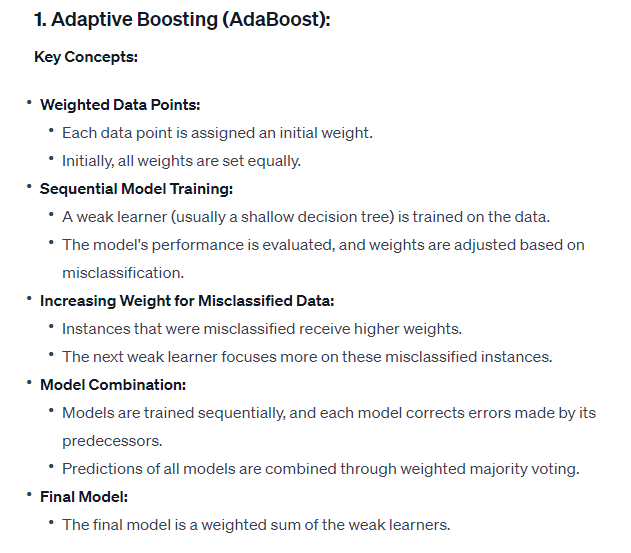

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [156]:
#base_estimator=DecisionTreeRegressor(max_depth=1)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [157]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [158]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 19]
 [21 53]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[389  55]
 [ 74 194]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       444
           1       0.78      0.72      0.75       268

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712



In [159]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.794973
test_precision    0.739662
test_recall       0.705556
test_f1           0.720628
dtype: float64

In [160]:
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostRegressor

In [161]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [162]:
model.estimator_errors_

array([0.21207865, 0.32968684, 0.46787915, 0.44714682, 0.48603852,
       0.48148402, 0.4899965 , 0.45170257, 0.45699855, 0.4592589 ,
       0.45938758, 0.46322641, 0.4862387 , 0.49189145, 0.46719794,
       0.47133732, 0.46288852, 0.47160998, 0.48367676, 0.47323533,
       0.48894702, 0.47176578, 0.48599054, 0.47631912, 0.47481689,
       0.49729395, 0.48058695, 0.46976321, 0.47850538, 0.47471262,
       0.48339566, 0.47264213, 0.47511653, 0.49815426, 0.48416309,
       0.47330855, 0.47585755, 0.47953512, 0.47728729, 0.47831263,
       0.48067845, 0.48147868, 0.48220478, 0.48512889, 0.49504218,
       0.49412846, 0.48533869, 0.48276036, 0.4822989 , 0.48628275])

# GridSearchCv for Adaboosting

In [163]:
model = AdaBoostClassifier(random_state=42)

In [164]:
param_grid = {"n_estimators": [20, 30, 50 , 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [165]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'accuracy')

In [166]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 50, 100, 200]},
             scoring='accuracy')

In [167]:
ada_grid_model.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [168]:
ada_grid_model.best_score_

0.8047276666994978

In [169]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[84 21]
 [18 56]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[400  44]
 [ 69 199]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       444
           1       0.82      0.74      0.78       268

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



# Feature importances

In [170]:
model = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Pclass,0.015
Embarked,0.015
Sex,0.020
Parch,0.025
SibSp,0.030
Age,0.100
Fare,0.795


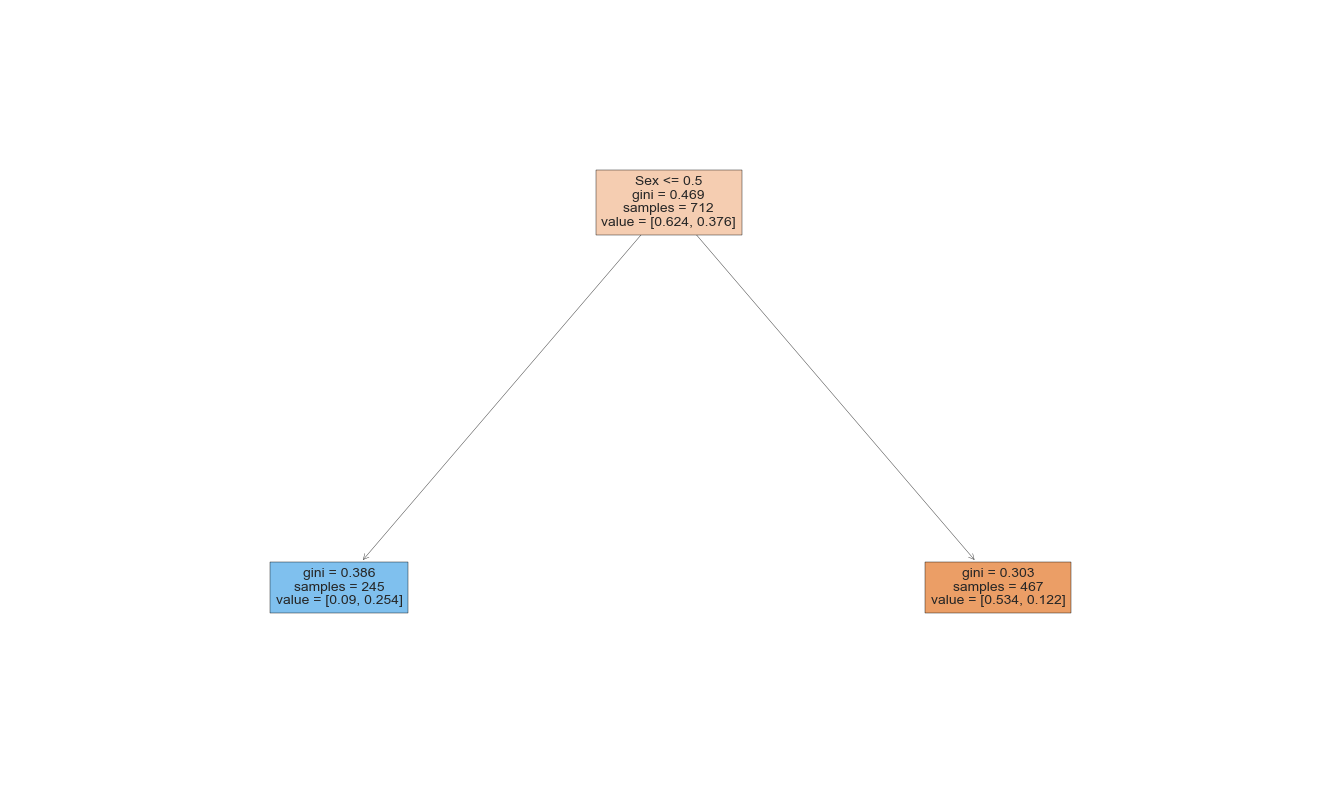

In [171]:
model = AdaBoostClassifier(random_state=42, n_estimators=200, learning_rate=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = list(X.columns)
plt.figure(figsize=(17,10),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

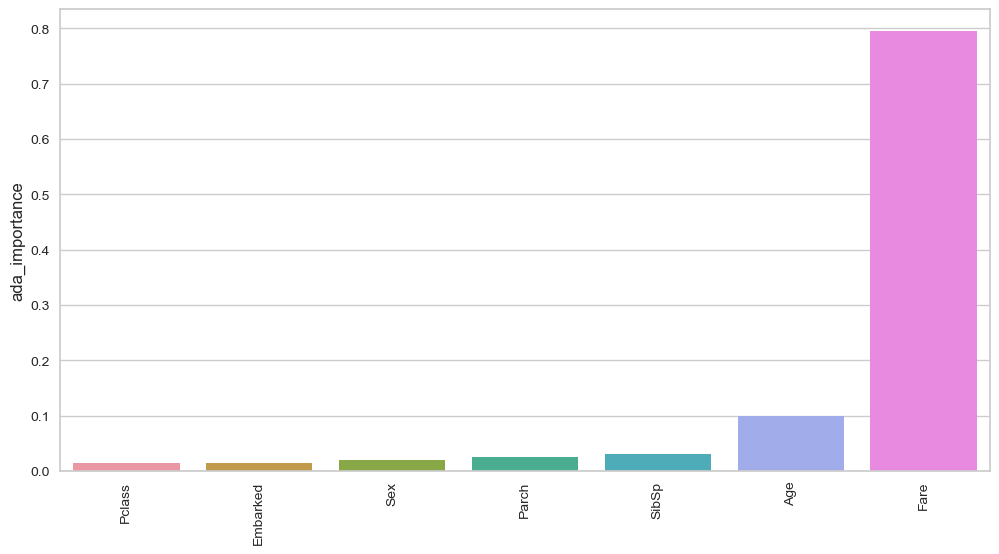

In [172]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

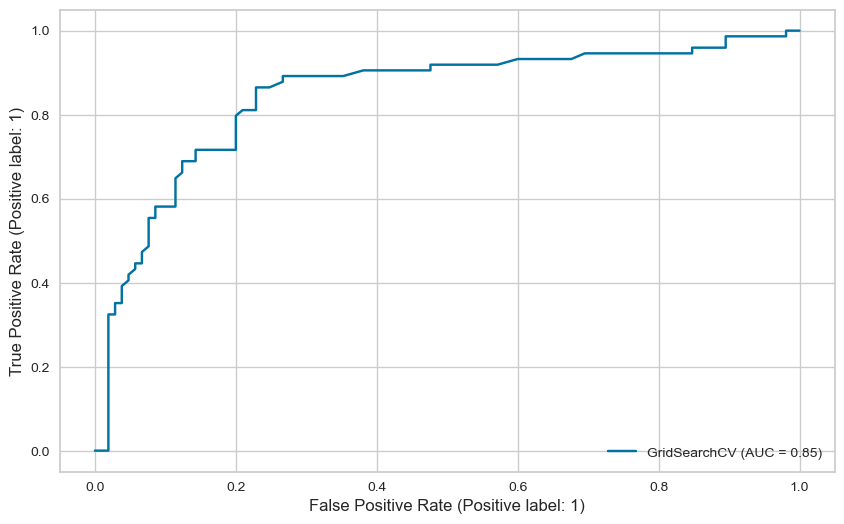

In [173]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score
plot_roc_curve(ada_grid_model, X_test, y_test)

# GradientBoosting Classifier

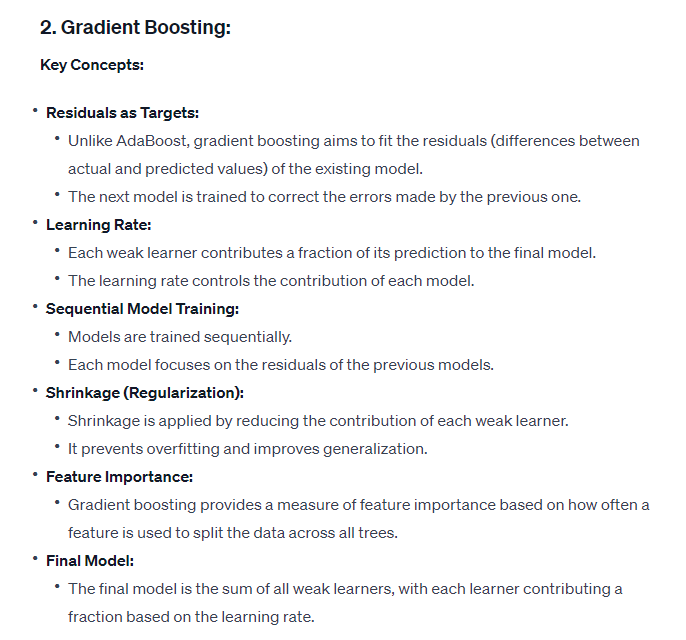

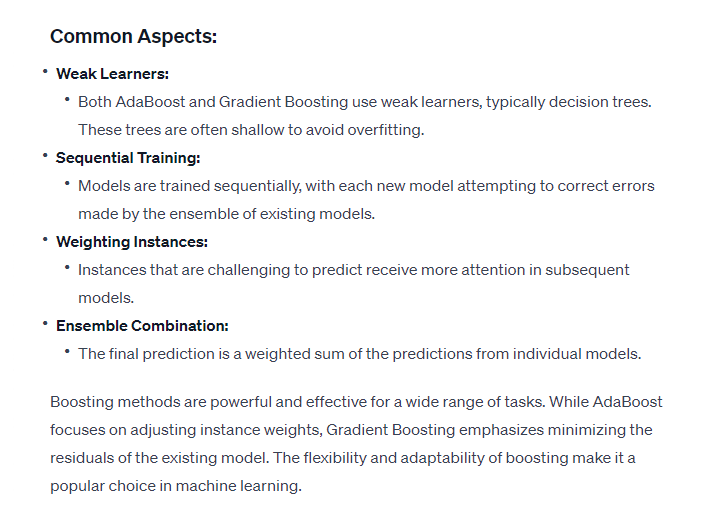

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
grad_model = GradientBoostingClassifier(random_state=42)

In [15]:
grad_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [16]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Train_Set
[[427  17]
 [ 60 208]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       444
           1       0.92      0.78      0.84       268

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712



In [17]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.832786
test_precision    0.840489
test_recall       0.690598
test_f1           0.754648
test_roc_auc      0.849964
dtype: float64

# GridSearchCV

In [18]:
param_grid = {"n_estimators":[20, 30, 50, 100, 200], "subsample":[0.5, 0.8, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.001, 0.01, 0.5, 1], 'max_depth':[2,3,4,5]}

In [19]:
gb_model = GradientBoostingClassifier(random_state=42)

In [20]:
grid = GridSearchCV(gb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


In [21]:
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'max_features': 2,
 'n_estimators': 30,
 'subsample': 1}

In [22]:
grid.best_score_

0.8272234807446075

In [23]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[88 17]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179


Train_Set
[[411  33]
 [ 74 194]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       444
           1       0.85      0.72      0.78       268

    accuracy                           0.85       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.85      0.85       712



# Feature importances

In [185]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Embarked,0.039448
Parch,0.057366
SibSp,0.060642
Age,0.067581
Pclass,0.108773
Fare,0.321369
Sex,0.344822


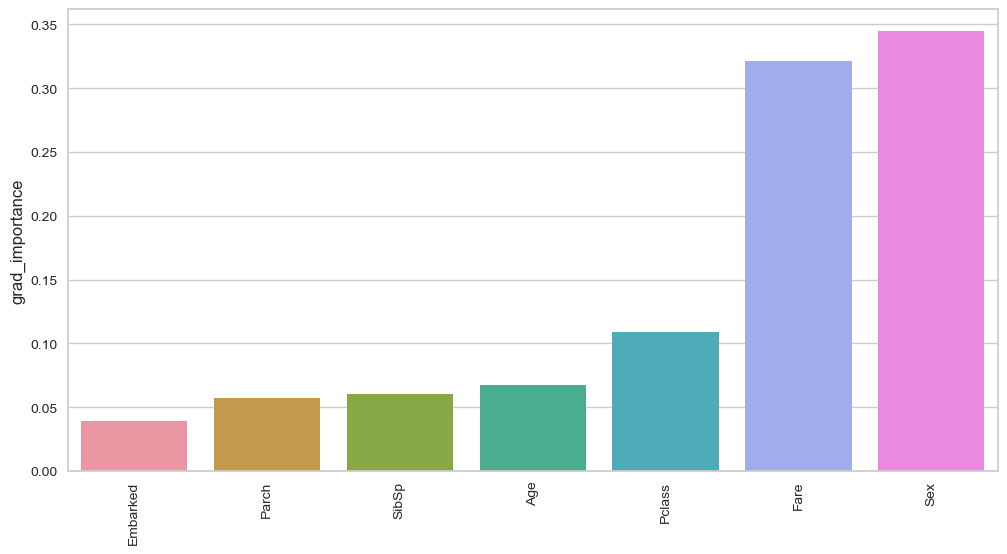

In [186]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

# ROC and AUC curves

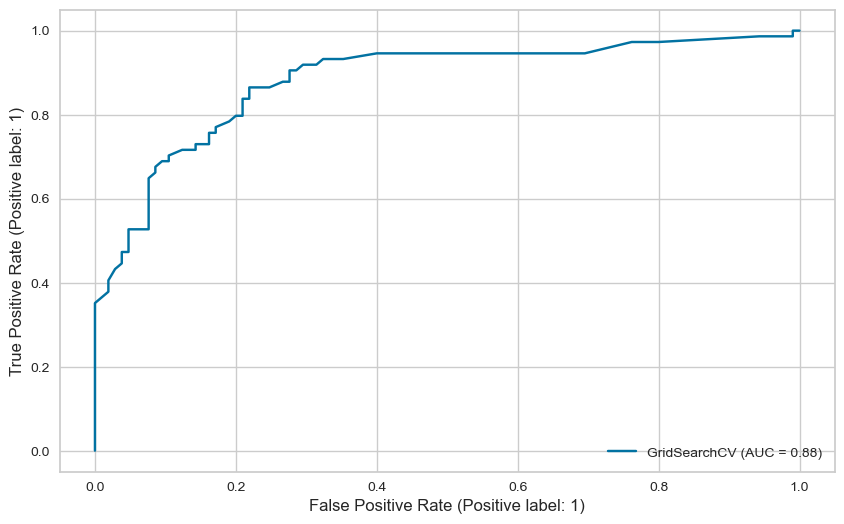

In [187]:
plot_roc_curve(grid, X_test, y_test);

# XGBoosting Classifier

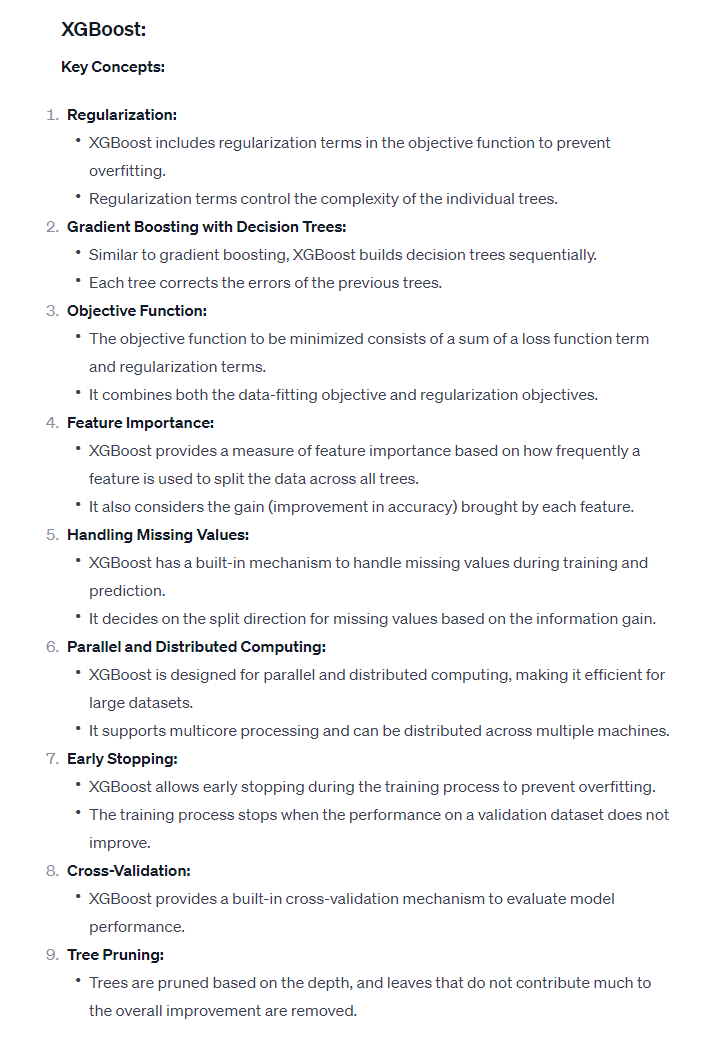

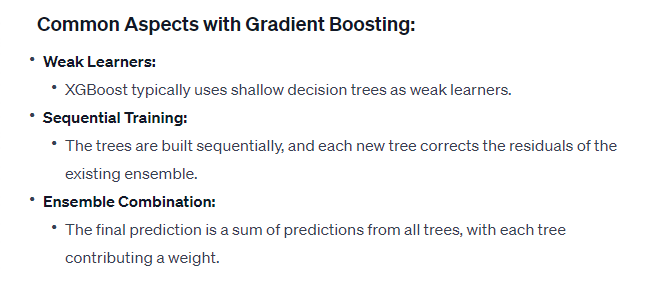

In [188]:
from xgboost import XGBClassifier

In [189]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [190]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[88 17]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[432  12]
 [ 26 242]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       444
           1       0.95      0.90      0.93       268

    accuracy                           0.95       712
   macro avg       0.95      0.94      0.94       712
weighted avg       0.95      0.95      0.95       712



In [191]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.802074
test_precision    0.762120
test_recall       0.701709
test_f1           0.726943
test_roc_auc      0.844198
dtype: float64

# GridSearchCV

In [192]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2, 0,5, 1],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5, 0.7, 1]}

In [193]:
xgb_model = XGBClassifier(random_state=42)

In [194]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [195]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [196]:
xgb_grid.best_score_

0.8272431793558553

In [197]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[91 14]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[423  21]
 [ 74 194]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       444
           1       0.90      0.72      0.80       268

    accuracy                           0.87       712
   macro avg       0.88      0.84      0.85       712
weighted avg       0.87      0.87      0.86       712



# Feature importances

In [198]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Parch,0.031873
Embarked,0.044947
SibSp,0.058489
Age,0.070082
Fare,0.100009
Pclass,0.142577
Sex,0.552023


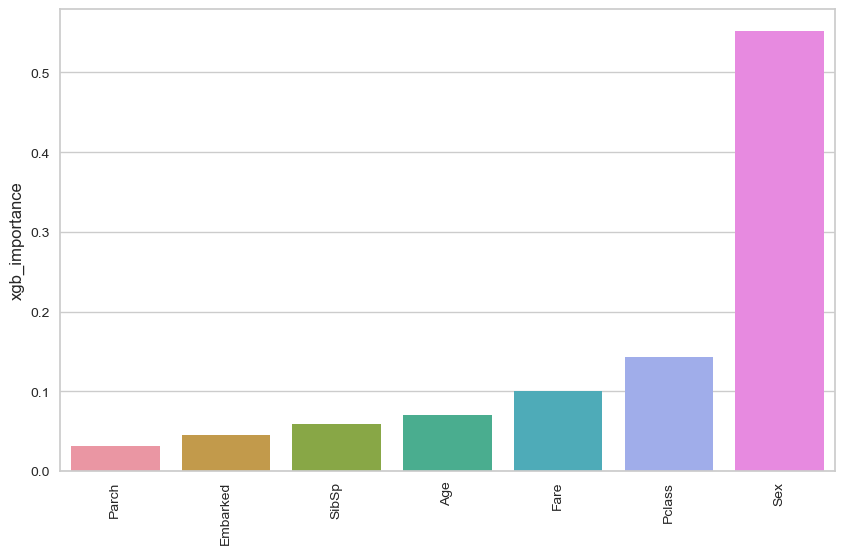

In [199]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

In [200]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Pclass,0.015,0.108773,0.142577
Embarked,0.015,0.039448,0.044947
Sex,0.020,0.344822,0.552023
Parch,0.025,0.057366,0.031873
SibSp,0.030,0.060642,0.058489
Age,0.100,0.067581,0.070082
Fare,0.795,0.321369,0.100009


# ROC and AUC curves

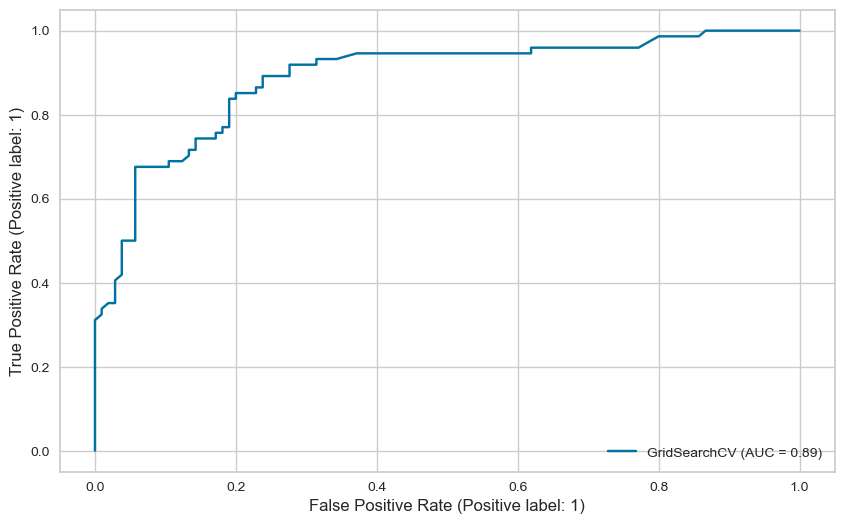

In [201]:
plot_roc_curve(xgb_grid, X_test, y_test);

# Final model

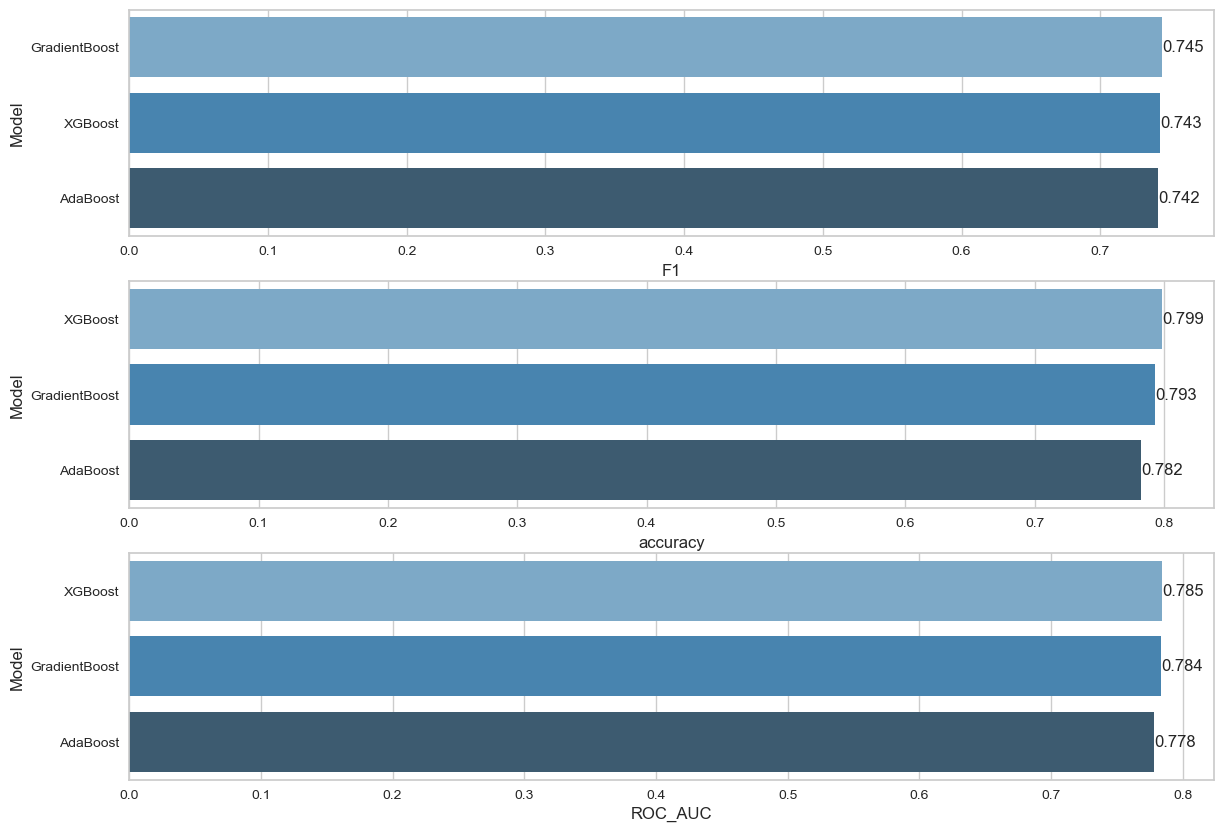

In [205]:
compare = pd.DataFrame({"Model": ["AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1" : [ada_f1, gb_f1, xgb_f1],
                        "accuracy" : [ada_accuracy, gb_accuracy, xgb_accuracy],
                        "ROC_AUC": [ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Eventough, all 3 boosting methods are achieved quite similar results. XGBoosting method is choosen just because the difference between Train val accuracy and f1 scores are closer to test values  than the others. Otherwise there is no significant difference between 3 boosting methods. Also, it is faster so it will require less time